# Manipulating Time Series Data in Python

# DATACAMP

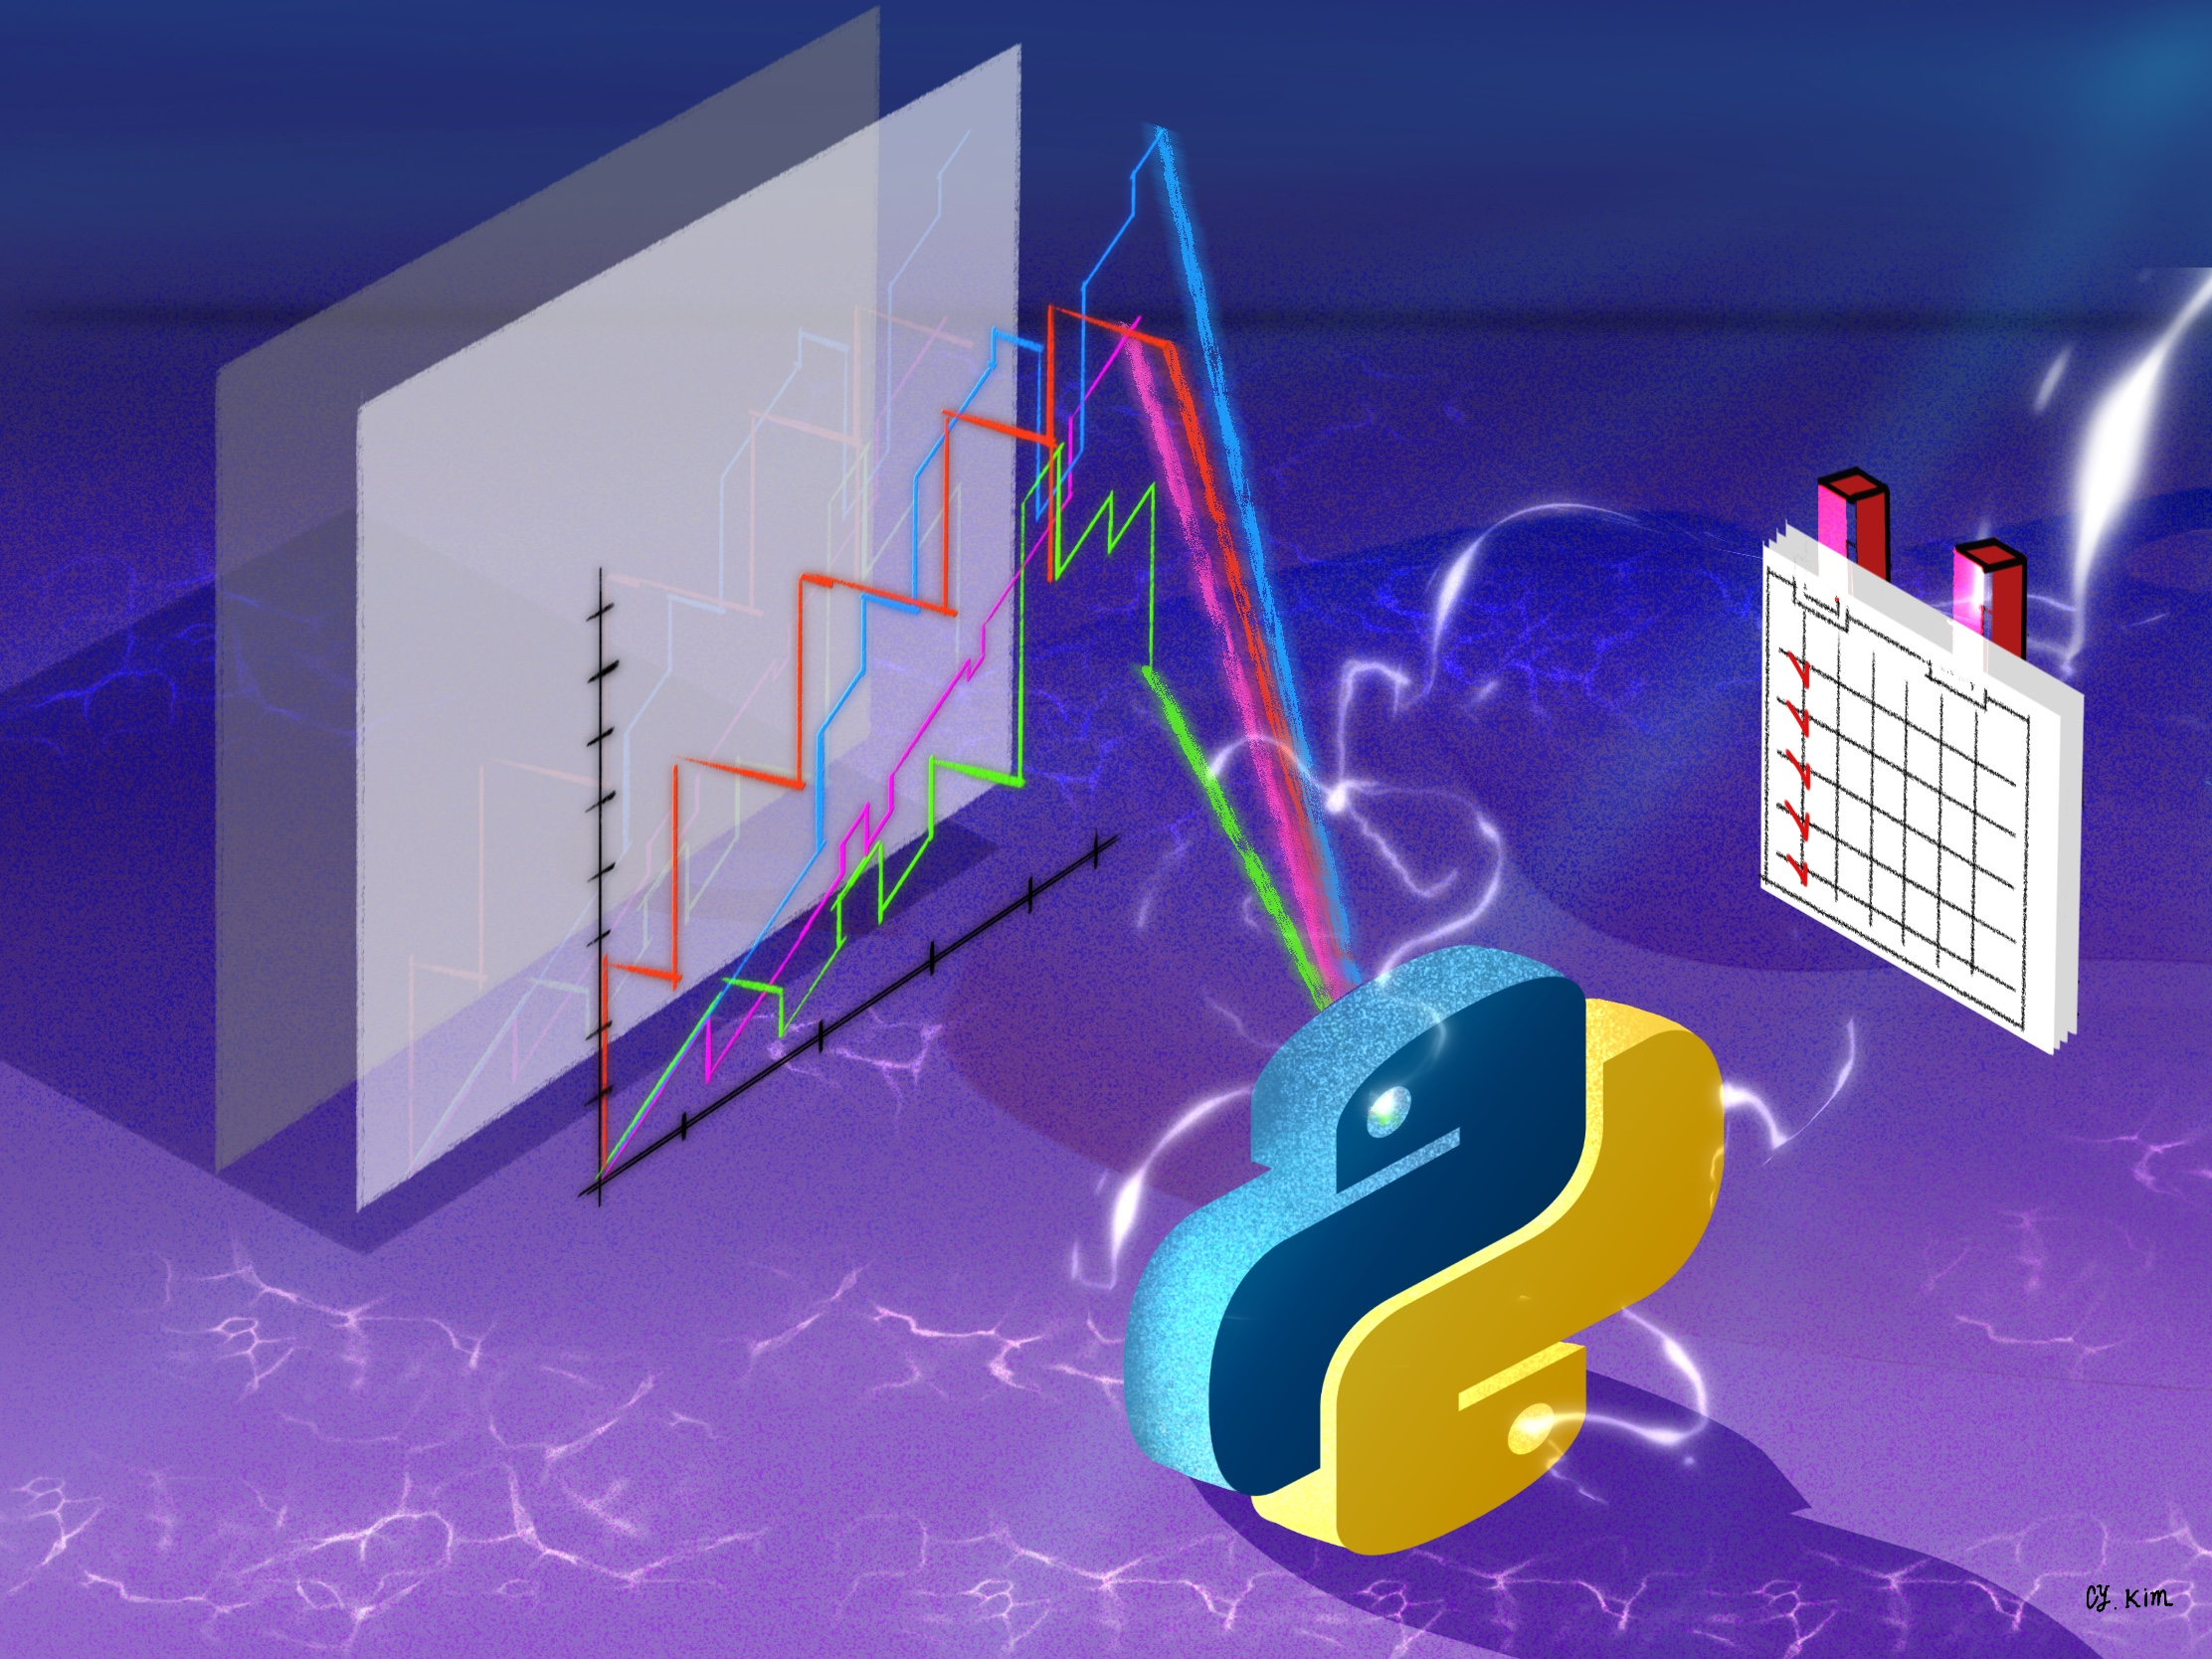

In [1]:
from IPython.display import Image
Image('ts.png')

# Course Description

In this course you'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series. Finally, you'll use all your new skills to build a value-weighted stock index from actual stock data.

In [2]:
# Your first time series
# 
# You have learned in the video how to create a sequence of dates using pd.date_range(). 
# You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp 
# with various attributes that you can access to obtain information about the date.
# 
# Now, you'll create a week of data, iterate over the result, 
# and obtain the dayofweek and weekday_name for each date.
# 
# Instructions
# 
# We have already imported pandas as pd for you.
# 
# Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. 
# Use the arguments start and periods. Assign the result to seven_days.
# Iterate over each date in seven_days and in each iteration, 
# print the .dayofweek and .weekday_name attributes.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7,freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

C:\Users\PAVILION 2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [5]:
# Create a time series of air quality data
# 
# You have seen in the video how to deal with dates that are not in the correct format, 
# but instead are provided as string types, represented as dtype object in pandas.
# 
# We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) 
# for you to practice the use of pd.to_datetime().
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt for you, 
# and loaded the air quality DataFrame into the variable data.
# 
# Inspect data using .info().
# Use pd.to_datetime to convert the column 'date' to dtype datetime64.
# Set the 'date' column as index.
# Validate the changes by inspecting data using .info() again.
# Plot data using subplots=True.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


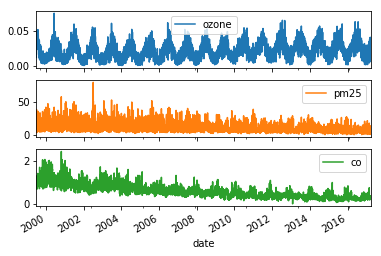

In [6]:
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date=pd.to_datetime(data.date)

# Set date column as index
data.set_index('date',inplace=True)

# Inspect data 
print(data.info())


# Plot data
data.plot(subplots=True)
plt.show()


In [7]:
# Compare annual stock price trends
# 
# In the video, you have seen how to select sub-periods from a time series.
# 
# You'll use this to compare the performance for three years of Yahoo stock prices.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded 
# the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.
# 
# Create an empty pd.DataFrame() called prices.
# Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
# Use the iteration variable to select the data for this year and the column price.
# Use .reset_index() with drop=True to remove the DatetimeIndex.
# Rename the column price column to the appropriate year.
# Use pd.concat() to combine the yearly data with the data in prices along axis=1.
# Plot prices.

In [8]:
yahoo = pd.read_excel('df.xlsx','ch1_Compare_annual')
yahoo.set_index('date',inplace=True)

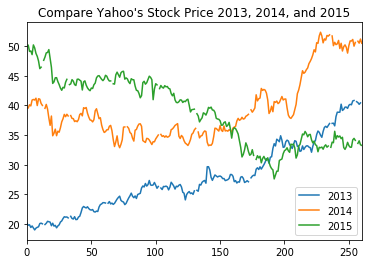

In [9]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(title = "Compare Yahoo's Stock Price 2013, 2014, and 2015")
plt.show()

In [10]:
# Set and change time series frequency
# 
# In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.
# 
# Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.
# 
# You'll set the frequency to calendar daily and then resample to monthly frequency, 
# and visualize both series to see how the different frequencies affect the data.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt and we have already 
# loaded the co_cities.csv file in a variable co.
# 
# Inspect co using .info().
# Use .asfreq() to set the frequency to calendar daily.
# Show a plot of 'co' using subplots=True.
# Change the the frequency to monthly using the alias 'M'.
# Show another plot of co using subplots=True.

In [11]:
co = pd.read_csv('co_cities.csv') 
co.date=pd.to_datetime(co.date)
#co.index = co.date
co.set_index('date',inplace=True)

In [12]:
co.head()

Chicago  Los Angeles  New York
date                                       
2005-01-01  0.317763     0.777657  0.639830
2005-01-03  0.520833     0.349547  0.969572
2005-01-04  0.477083     0.626630  0.905208
2005-01-05  0.348822     0.613814  0.769176
2005-01-06  0.572917     0.792596  0.815761

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


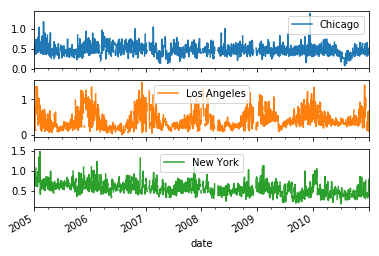

In [13]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

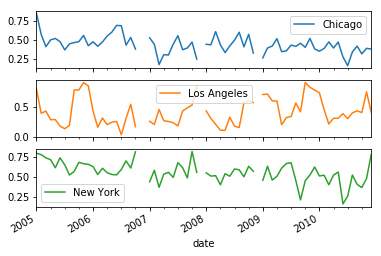

In [17]:
# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

In [14]:
# Shifting stock prices across time
# 
# The first method to manipulate time series that you saw in the video was .shift(), 
# which allows you shift all values in a Series or DataFrame by a number of periods 
# to a different time along the DateTimeIndex.
# 
# Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt.
# 
# Use pd.read_csv() to import 'google.csv', parsing the 'Date' as dates, 
# setting the result as index and assigning to google.
# Use .asfreq() to set the frequency of google to business daily.
# Add new columns lagged and shifted to google that contain the Close shifted by 90 business days 
# into past and future, respectively.
# Plot the three columns of google.

In [15]:
google = pd.read_csv('stock_data\google.csv', parse_dates=['Date'], index_col='Date')

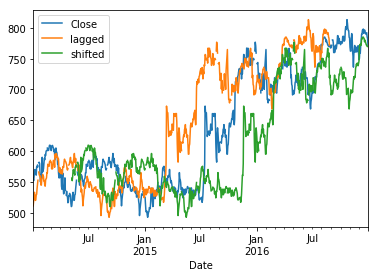

In [16]:
# Import data here
#google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')
 
# Set data frequency to business daily
google = google.asfreq('B')
 
# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)
 
# Plot the google price series
google.plot()
plt.show()

In [17]:
# Calculating stock price changes
# 
# You have learned in the video how to calculate returns using current and shifted prices as input. 
# Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, 
# and compare the result to the function .diff().
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt. 
# We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, 
# and assigned the result to yahoo.
# 
# Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
# Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
# Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
# Inspect the last five rows of yahoo to verify the calculation.
# Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of 
# the result to show both columns are equal.

In [18]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)
 
# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']
 
# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)
 
# Inspect the last five rows of price
print(yahoo.tail())
 
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


In [19]:
# Plotting multi-period returns
# 
# The last time series method you have learned about in the video was .pct_change(). 
# Let's use this function to calculate returns for various calendar day periods, 
# and plot the result to compare the different patterns.
# 
# We'll be using Google stock prices from 2014-2016.
# 
# Instructions
# 
# We have already imported pandas as pd, and matplotlib.pyplot as plt. 
# We have also loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, 
# and assigned the result to google.
# 
# Create the columns 'daily_return', 'monthly_return', and 'annual_return' 
# that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
# Plot the result using subplots=True.

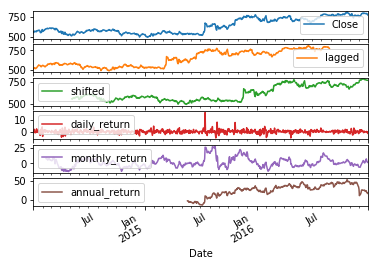

In [20]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)
 
# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)
 
# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)
 
# Plot the result
google.plot(subplots=True)
plt.show()

# 2. Basic Time Series Metrics & Resampling

This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

In [21]:
# Compare the performance of several asset classes
# 
# You have seen in the video how you can easily compare several time series by normalizing 
# their starting points to 100, and plot the result.
# 
# To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt.
# 
# Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index, t
# hen assign the result to prices.
# Select the first price for each series using .iloc[0] on prices and assign the result to first_prices.
# Divide prices by first_prices, multiply by 100 and assign the result to normalized.
# Plot normalized.

In [22]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\asset_classes.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


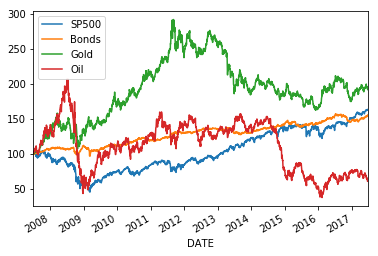

In [23]:
# Import data here
prices = pd.read_csv(path,parse_dates=['DATE'],index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

In [24]:
# Comparing stock prices with a benchmark
# 
# You also learned in the video how to compare the performance of various stocks against a benchmark. 
# Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to 
# the Dow Jones Industrial Average, which contains the 30 largest US companies.
# 
# The three largest companies on the NYSE are:
# 
# Company	Stock Ticker
# Johnson & Johnson	JNJ
# Exxon Mobil	XOM
# JP Morgan Chase	JPM
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt.
# 
# Use pd.read_csv() to import 'nyse.csv' and 'dow_jones.csv', creating a DatetimeIndex for each from 
# the 'date' column using parse_dates and index_col, and assign the result to stocks and dow_jones, respectively.
# 
# Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data. Inspect the .info() of data.
# Divide data by the first value for each series, multiply by 100 and plot the result.

In [25]:
path_nyse = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\nyse.csv'
path_dow_jones = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\dow_jones.csv'

In [26]:
stocks = pd.read_csv(path_nyse,parse_dates=['date'],index_col='date')
dow_jones = pd.read_csv(path_dow_jones,parse_dates=['date'],index_col='date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


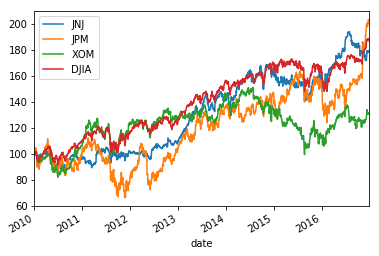

In [27]:
# Import stock prices and index here
#stocks = pd.read_csv('nyse.csv',parse_dates=['date'],index_col='date')
#dow_jones = pd.read_csv('dow_jones.csv',parse_dates=['date'],index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks,dow_jones],axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()

plt.show()



In [28]:
# Plot performance difference vs benchmark index
# 
# In the video, you learned how to calculate and plot the performance difference 
# of a stock in percentage points relative to a benchmark index.
# 
# Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt.
# 
# Create the list tickers containing the two stock symbols.
# Use pd.read_csv() to import 'msft_aapl.csv' and 'sp500.csv', creating a DatetimeIndex for each from 
# the 'date' column using parse_dates and index_col, and assign the result to stocks and sp500, respectively.
# 
# Use pd.concat() to concatenate stocks and sp500 along axis=1, apply .dropna() to drop all missing values, 
# and assign the result to data.
# Normalize data by dividing by the first price, multiply by 100 and assign the output to normalized.
# Select tickers from normalized, and subtract normalized['SP500'] with keyword axis=0 to align the indexes, 
# then plot the result.

In [29]:
path_msft_aapl = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\msft_aapl.csv'
path_sp500 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\sp500.csv'

In [30]:
stocks = pd.read_csv(path_msft_aapl,parse_dates=['date'],index_col='date')
sp500 = pd.read_csv(path_sp500,parse_dates=['date'],index_col='date')

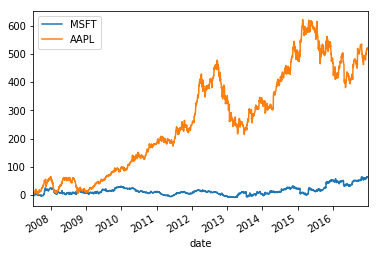

In [31]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
#stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
#sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

In [32]:
normalized.head()

AAPL        MSFT       SP500
date                                          
2007-06-29  100.000000  100.000000  100.000000
2007-07-02   99.368904  100.916186  101.069611
2007-07-03  104.245554  101.866305  101.431470
2007-07-05  108.777969  101.764506  101.466724
2007-07-06  108.433735  101.696641  101.801976

In [33]:
# Convert monthly to weekly data
# 
# You have learned in the video how to use .reindex() to conform an existing time series 
# to a DateTimeIndex at a different frequency.
# 
# Let's practice this method by creating monthly data and then converting this data 
# to weekly frequency while applying various fill logic options.
# 
# Instructions
# 
# We have already imported pandas as pd for you. We have also defined start and end dates.
# 
# Create monthly_dates using pd.date_range with start, end and frequency alias 'M'.
# Create and print the pd.Series monthly, passing the list [1, 2] as the data argument, and using monthly_dates as index.
# Create weekly_dates using pd.date_range with start, end and frequency alias 'W'.
# Apply .reindex() to monthly three times: first without additional options, 
# then with bfill and then with ffill, print()-ing each result.

In [34]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


In [35]:
# Create weekly from monthly unemployment data
# 
# The civilian US unemployment rate is reported monthly. You may need more frequent data, 
# but that's no problem because you just learned how to upsample a time series.
# 
# You'll work with the time series data for the last 20 years, 
# and apply a few options to fill in missing values before plotting the weekly series.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt.
# 
# Use pd.read_csv() to import 'unemployment.csv', creating a DateTimeIndex from the 'date' 
# column using parse_dates and index_col, and assign the result to data.
# 
# Convert data to weekly frequency using .asfreq() with the alias 'W' and show the first five rows.
# Convert again to weekly frequency, adding the option 'bfill' and show the first five rows.
# Create weekly series, now adding the option 'ffill', assign to weekly_ffill and show the first five rows.
# Plot weekly_ffill starting in 2015.

In [36]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\unrate.csv'

In [37]:
# Import data here
data = pd.read_csv(path, parse_dates=['DATE'], index_col='DATE')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

            UNRATE
DATE              
2010-01-03     NaN
2010-01-10     NaN
2010-01-17     NaN
2010-01-24     NaN
2010-01-31     NaN
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8


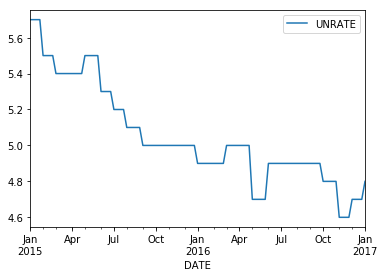

In [38]:
# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

In [39]:
# Use interpolation to create weekly employment data
# 
# You have recently used the civilian US unemployment rate, and converted it from monthly 
# to weekly frequency using simple forward or backfill methods.
# 
# Compare your previous approach to the new .interpolate() method that you learned about in this video.
# 
# Instructions
# 
# We have imported pandas as pd and matplotlib.pyplot as plt for you. 
# We have also loaded the monthly unemployment rate from 2010 to 2016 into a variable monthly.
# 
# Inspect monthly using .info().
# Create a pd.date_range() with weekly dates, using the .min() and .max() 
# of the index of monthly as start and end, respectively, and assign the result to weekly_dates.
# Apply .reindex() using weekly_dates to monthly and assign the output to weekly.
# Create new columns 'ffill' and 'interpolated' by applying .ffill() and .interpolate() to weekly.UNRATE

In [40]:
monthly = data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
UNRATE    85 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB
None


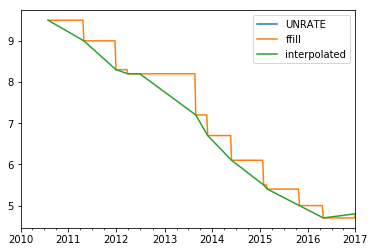

In [41]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()

In [42]:
# Interpolate debt/GDP and compare to unemployment
# 
# Since you have learned how to interpolate time series, 
# you can now apply this new skill to the quarterly debt/GDP series, 
# and compare the result to the monthly unemployment rate.
# 
# Instructions
# 
# We have imported pandas as pd and matplotlib.pyplot as plt for you.
# 
# Use pd.read_csv() to import 'debt_unemployment.csv', creating a DateTimeIndex from 
# the 'date' column using parse_dates and index_col, and assign the result to data. print() the .info() of the data.
# 
# Apply .interpolate() to data and assign this to interpolated, then inspect the result.
# Plot interpolated with 'Unemployment' on the secondary_y axis.

In [43]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\debt_unemployment.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


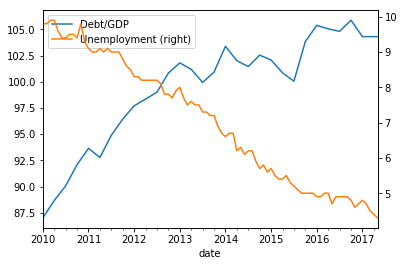

In [44]:
# Import & inspect data here
data = pd.read_csv(path, parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment');
plt.show()


In [45]:
# Compare weekly, monthly and annual ozone trends for NYC & LA
# 
# You have seen in the video how to downsample and aggregate time series on air quality.
# 
# First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare 
# the air quality trend at weekly, monthly and annual frequencies and explore how different 
# resampling periods impact the visualization.
# 
# Instructions
# We have again imported pandas as pd and matplotlib.pyplot as plt for you.
# 
# Use pd.read_csv() to import 'ozone.csv' and set a DateTimeIndex based on the 'date' column 
# using parse_dates and index_col, assign the result to ozone and inspect using .info().
# Apply .resample() with weekly frequency ('W') to ozone, aggregate using .mean() and plot the result.
# Repeat with monthly ('M') and annual ('A') frequencies, plotting each result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB


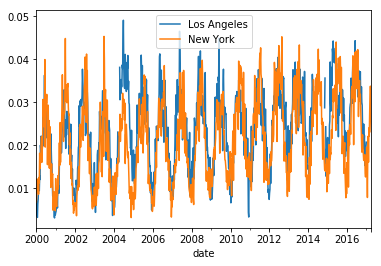

In [46]:
# Import and inspect data here
ozone = pd.read_csv('ozone_nyla.csv', parse_dates=['date'], index_col='date')
ozone.info();

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot();
plt.show()

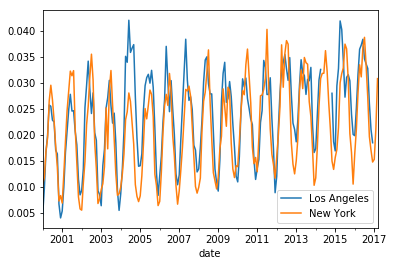

In [47]:
# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot();
plt.show();

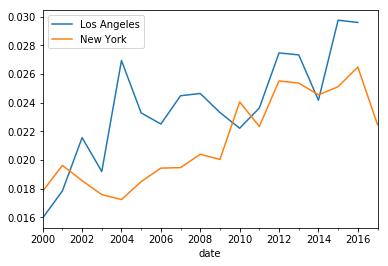

In [48]:
# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot();
plt.show();

In [49]:
# Compare monthly average stock prices for Facebook and Google
# 
# Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google 
# for the 2015-2016 period to compare the trend of the monthly averages.
# 
# Instructions
# 
# We have again imported pandas as pd and matplotlib.pyplot as plt for you.
# 
# Use pd.read_csv() to import 'stocks.csv' and set a DateTimeIndex based on the 'date' column 
# using parse_dates and index_col, assign the result to stocks and inspect using .info().
# 
# Create monthly_average by applying .resample() with monthly frequency to data, using .mean() 
# to aggregate. Plot the result using subplots.

In [50]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\goog_fb.csv'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


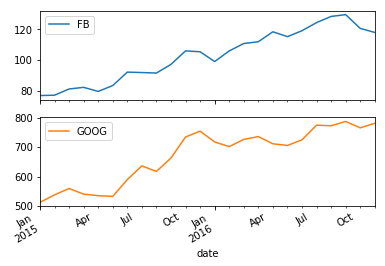

In [51]:
# Import and inspect data here
stocks = pd.read_csv(path, parse_dates=['date'], index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True);
plt.show();


In [52]:
# Compare quarterly GDP growth rate and stock returns
# 
# With your new skill to downsample and aggregate time series, 
# you can compare higher-frequency stock price series to lower-frequency economic time series.
# 
# As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on 
# the (resampled) Dow Jones Industrial index of 30 large US stocks.
# 
# GDP growth is reported at the beginning of each quarter for the previous quarter. 
# To calculate matching stock returns, you'll resample the stock index to quarter start frequency 
# using the alias 'QS', and aggregating using the .first() observations.
# 
# Instructions
# 
# As usual, we have imported pandas as pd and matplotlib.pyplot as plt for you.
# 
# Use pd.read_csv() to import 'gdp_growth.csv' and 'djia.csv', 
# for both set a DateTimeIndex based on the 'date' column using parse_dates and index_col, 
# and assign the results to gdp_growth and djia respectively, then inspect using .info().
# 
# Resample djia using frequency alias 'QS', aggregate using .first(), and assign to djia_quarterly.
# Apply .pct_change() to djia_quarterly and .mul() by 100 to obtain djia_quarterly_return.
# Use pd.concat() to concatenate gdp_growth and djia_quarterly_return along axis=1, 
# and assign to data. Rename the columns using .columns and the new labels 'gdp' and 'djia', then .plot() the results.

In [53]:
path1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\gdp_growth.csv'
path2 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\djia.csv'

In [54]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv(path1, parse_dates=['date'], index_col='date')
gdp_growth.info()

# Import and inspect djia here
djia = pd.read_csv(path2, parse_dates=['date'], index_col='date')
djia.info()

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB


In [55]:
data.head()

gdp      djia
date                     
2007-01-01  0.2       NaN
2007-04-01  3.1       NaN
2007-07-01  2.7  0.945735
2007-10-01  1.4  4.079072
2008-01-01 -2.7 -7.407889

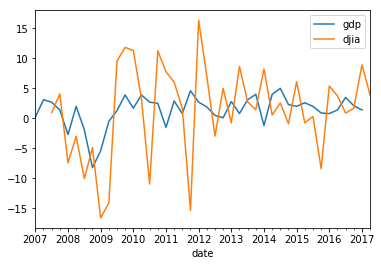

In [56]:
data.plot()
plt.show();

In [57]:
# Visualize monthly mean, median and standard deviation of S&P500 returns
# 
# You have also learned how to calculate several aggregate statistics from upsampled data.
# 
# Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns 
# have trended over the last 10 years.
# 
# Instructions
# 
# As usual, we have imported pandas as pd and matplotlib.pyplot as plt for you.
# 
# Use pd.read_csv() to import 'sp500.csv', set a DateTimeIndex based on the 'date' column using parse_dates 
# and index_col, assign the results to sp500, and inspect using .info().
# 
# Convert sp500 to a pd.Series() using .squeeze(), and apply .pct_change() to calculate daily_returns.
# .resample() daily_returns to month-end frequency (alias: 'M'), and apply .agg() to calculate 'mean', 
# 'median', and 'std'. Assign the result to stats.
# .plot() stats.

In [58]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\sp500.csv'

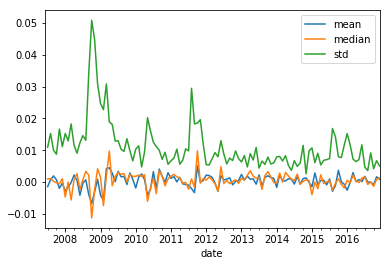

In [59]:
# Import data here
sp500 = pd.read_csv(path, parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show();

# 3. Window Functions: Rolling & Expanding Metrics

This chapter will show you how to use window function to calculate time series metrics for both rolling and expanding windows.

In [60]:
# Rolling average air quality since 2010 for new york city
# 
# The last video was about rolling window functions. To practice this new tool, 
# you'll start with air quality trends for New York City since 2010. 
# In particular, you'll be using the daily Ozone concentration levels provided by the Environmental 
# Protection Agency to calculate & plot the 90 and 360 day rolling average.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt.
# 
# Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column 
# using parse_dates and index_col, and assign the result to data.
# Add the columns '90D' and '360D' containing the 90 and 360 rolling calendar day .mean() for the column 'Ozone'.
# Plot data starting 2010, setting 'New York City' as title.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


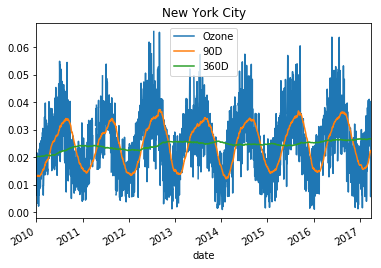

In [61]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title='New York City')
plt.show()

In [62]:
# Rolling 360-day median & std. deviation for nyc ozone data since 2000
# 
# The last video also showed you how to calculate several rolling statistics using the .agg() method, similar to .groupby().
# 
# Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. 
# The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.
# 
# You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation 
# for the daily average ozone values since 2000.
# 
# Instructions
# 
# We have already imported pandas as pd, and matplotlib.pyplot as plt.
# 
# Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, 
# assign the result to data, and drop missing values using .dropna().
# Select the 'Ozone' column and create a .rolling() window using 360 periods, apply .agg() 
# to calculate the mean and std, and assign this to rolling_stats.
# Use .join() to concatenate data with rolling_stats, and assign to stats.
# Plot stats using subplots.

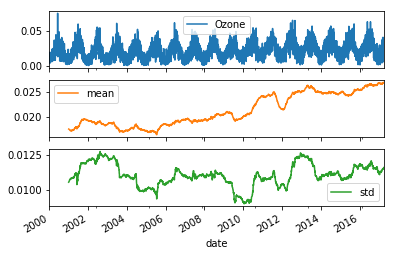

In [63]:
# Import and inspect ozone data here
data = pd.read_csv('ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True);
plt.show()


In [64]:
# Rolling quantiles for daily air quality in nyc
# 
# You learned in the last video how to calculate rolling quantiles to describe changes in 
# the dispersion of a time series over time in a way that is less sensitive to outliers 
# than using the mean and standard deviation.
# 
# Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily 
# average ozone concentration in NYC using a 360-day rolling window.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt. 
# We have also loaded the ozone data from 2000-2017 into the variable data.
# 
# Apply .resample() with daily frequency 'D' to data and apply .interpolate() to fill missing values, and reassign to data.
# Inspect the result using .info().
# Create a .rolling() window using 360 periods, select the column 'Ozone', and assign the result to rolling.
# Insert three new columns, 'q10', 'q50' and 'q90' into data, calculating the respective quantiles from rolling.
# Plot data.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB


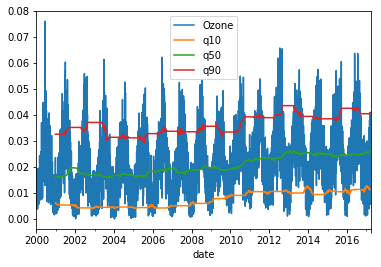

In [65]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)

# Plot the data
data.plot()
plt.show()


In [66]:
# Cumulative sum vs .diff()
# 
# In the video, you have learned about expanding windows that allow you to run cumulative calculations.
# 
# The cumulative sum method has in fact the opposite effect of the .diff() method that you came across in chapter 1.
# 
# To illustrate this, let's use the Google stock price time series, 
# create the differences between prices, and reconstruct the series using the cumulative sum.
# 
# Instructions
# We have already imported pandas as pd and matplotlib.pyplot as plt. 
# We have also loaded google stock prices into the variable data
# 
# Apply .diff() to data, drop missing values, and assign the result to differences.
# Use .first('D') to select the first price from data, and assign it to start_price.
# Use .append() to combine start_price and differences, apply .cumsum() and assign this to cumulative_sum.
# Use .equals() to compare data and cumulative_sum, and print the result.

In [67]:
data = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

In [68]:
# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()


# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

False


In [69]:
# Cumulative return on $1,000 invested in google vs apple I
# 
# To put your new ability to do cumulative return calculations to practical use, 
# let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.
# 
# Instructions
# We have already imported pandas as pd, and matplotlib.pyplot as plt.
# We have also loaded Google and Apple stock prices in a variable data.
# 
# Define a variable investment with the value 1000.
# Calculate returns by applying .pct_change() to data.
# Add 1 to returns and assign this to returns_plus_one, then apply .cumprod() 
# to returns_plus_one and assign the result to cumulative_return.
# Multiply cumulative_return by investment, and plot the result.

In [70]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\apple_google.csv'
data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

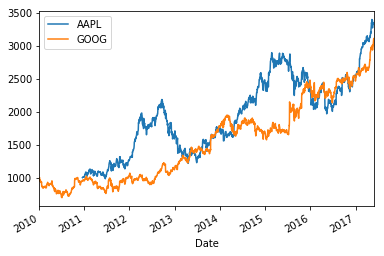

In [72]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show();


In [73]:
# Cumulative return on $1,000 invested in google vs apple II
# 
# Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods,
# so that switching between the two stocks might have yielded an even better result.
# 
# To analyze this, calculate that cumulative return for rolling 1-year periods, 
# and then plot the returns to see when each stock was superior.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt. 
# We have also loaded the GOOG and AAPL close prices from the last exercise into data.
# 
# Define a multi_period_return() function that returns the cumulative return from an array of period returns.
# Calculate daily_returns by applying .pct_change() to data.
# Create a '360D' .rolling() window on daily_returns, and .apply() multi_period_returns. 
# Assign the result to rolling_annual_returns.
# Plot rolling_annual_returns after multiplying it by 100.

C:\Users\PAVILION 2\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if sys.path[0] == '':


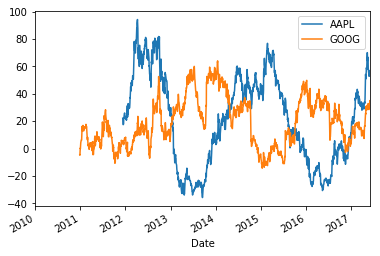

In [74]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()

In [75]:
Random walk I

In the last video, you have seen how to generate a random walk of returns, 
and how to convert this random return series into a random stock price path.

In this exercise, you'll build your own random walk by drawing random numbers from 
the normal distribution with the help of numpy.

Instructions
We have already imported pandas as pd, functions normal and seed from numpy.random, and matplotlib.pyplot as plt.

Set seed to 42.
Use normal to generate 2,500 random returns with the parameters loc=.001, scale=.01 and assign this to random_walk.
Convert random_walk to a pd.Series object and reassign it to random_walk.
Create random_prices by adding 1 to random_walk and calculating the cumulative product.
Multiply random_prices by 1,000 and plot the result for a price series starting at 1,000.

SyntaxError: invalid syntax (<ipython-input-75-3d2d3bcba477>, line 1)

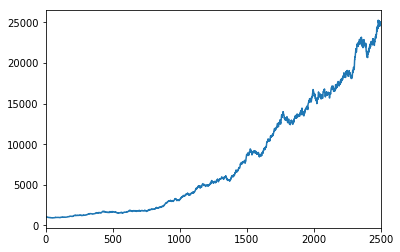

In [76]:
# Set seed here
#seed(42)
np.random.seed(42)

# Create random_walk
#random_walk = normal(loc=.001, scale=0.01, size=2500)
random_walk = np.random.normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show();

In [78]:
# Random walk II
# 
# In the last video, you have also seen how to create a random walk of returns by sampling from actual returns, 
# and how to use this random sample to create a random stock price path.
# 
# In this exercise, you'll build a random walk using historical returns from Facebook's stock price 
# since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.
# 
# Instructions
# 
# We have already imported pandas as pd, choice and seed from numpy.random, seaborn as sns, and matplotlib.pyplot as plt.
# We have also imported the FB stock price series since IPO in May 2012 as the variable fb. Inspect this using .head().
# 
# Set seed to 42.
# Apply .pct_change() to generate daily Facebook returns, drop missing values, and assign to daily_returns.
# Create a variable n_obs that contains the .count() of Facebook daily_returns.
# Use choice() to randomly select n_obs samples from daily_returns, and assign to random_walk.
# Convert random_walk to a pd.Series and reassign it to itself.
# Use sns.distplot() to plot the distribution of random_walk.

In [79]:
import seaborn as sns
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\fb.csv'
fb = pd.read_csv(path,names=['date','price'], parse_dates=['date'], index_col='date')
fb = fb.price
fb.shape

(1267,)

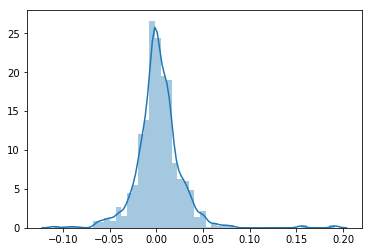

In [80]:
# Set seed here
#seed(42)
np.random.seed(42)

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = np.random.choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show();


In [81]:
# Random walk III
# 
# In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. 
# You'll start off with a random sample of returns like the one you've generated during the last exercise and use it 
# to create a random stock price path.
# 
# Instructions
# 
# We have already imported pandas as pd, choice and seed from numpy.random, and matplotlib.pyplot as plt. 
# We have loaded the Facebook price as a pd.DataFrame in the variable fb and a random sample of daily FB returns 
# as pd.Series in the variable random_walk.
# 
# Select the first Facebook price by applying .first('D') to fb.price, and assign to start.
# Add 1 to random_walk and reassign it to itself, then .append() random_walk to start and assign this to random_price.
# Apply .cumprod() to random_price and reassign it to itself.
# Insert random_price as new column labeled random into fb and plot the result.

In [193]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\fb.csv'
fb = pd.read_csv(path,names=['date','price'], parse_dates=['date'], index_col='date')

In [220]:
random_walk = pd.read_excel('df.xlsx','ch3_rw3', index_col='date')
#df['new'] = df['rw'].astype(float)
random_walk['Unnamed: 1'] = pd.to_numeric(random_walk['Unnamed: 1'],errors='coerce')
random_walk = random_walk['Unnamed: 1']

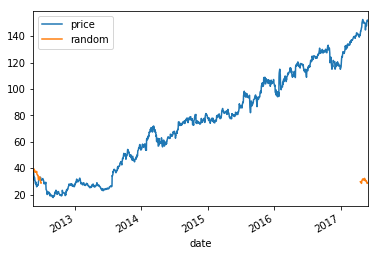

In [222]:
# Select fb start price here
start = fb.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()


In [223]:
# Annual return correlations among several stocks
# 
# You have seen in the video how to calculate correlations, and visualize the result.
# 
# In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), 
# WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.
# 
# You'll calculate the year-end returns, the pairwise correlations among all stocks, 
# and visualize the result as an annotated heatmap.
# 
# Instructions
# 
# We have already imported pandas as pd, seaborn as sns, and matplotlib.pyplot as plt. 
# We have loaded the daily close price for the five stocks in a variable called data.
# 
# Inspect using .info().
# Apply .resample() with year-end frequency (alias: 'A') to data and select the .last() price from each subperiod; 
# assign this to annual_prices.
# Calculate annual_returns by applying .pct_change() to annual_prices.
# Calculate correlations by applying .corr() to annual_returns and print the result.
# Visualize correlations as an annotated sns.heatmap().

In [228]:
data = pd.read_excel('df.xlsx','ch3_annual_return',parse_dates=['date'], index_col='date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
AAPL    4000 non-null float64
AMZN    4000 non-null float64
IBM     4000 non-null float64
WMT     4000 non-null float64
XOM     4000 non-null float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


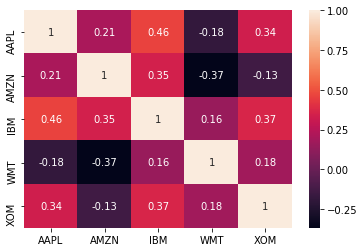

In [229]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show();


# 4. Putting it all together: Building a value-weighted index

This chapter combines the previous concepts by teaching you how to create a value-weighted index. This index uses market-cap data contained in the stock exchange listings to calculate weights and 2016 stock price information. Index performance is then compared against benchmarks to evaluate the performance of the index you created.

In [230]:
# Explore and clean company listing information
# 
# To get started with the construction of a market-value based index, 
# you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.
# 
# In this and the next exercise, you will calculate market-cap weights for these stocks.
# 
# We have already imported pandas as pd, and loaded the listings data set with listings information 
# from the NYSE, NASDAQ, and AMEX. The column 'Market Capitalization' is already measured in USD mn.
# 
# Instructions
# 
# Inspect listings using .info().
# Move the column 'Stock Symbol' into the index (inplace).
# Drop all companies with missing 'Sector' information from listings.
# Select companies with IPO Year before 2019.
# Inspect the result of the changes you just made using .info().
# Show the number of companies per 'Sector' using .groupby() and .size(). Sort the output in descending order.

In [231]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\listings.xlsx'
listings = pd.read_excel(path)
#listings.head()

In [232]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
#print(listings.groupby('Sector').size().sort_values(ascending=False))
listings.groupby('Sector').size().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
Stock Symbol             360 non-null object
Company Name             360 non-null object
Last Sale                346 non-null float64
Market Capitalization    360 non-null float64
IPO Year                 105 non-null float64
Sector                   238 non-null object
Industry                 238 non-null object
dtypes: float64(3), object(4)
memory usage: 19.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ACU to ZDGE
Data columns (total 6 columns):
Company Name             45 non-null object
Last Sale                45 non-null float64
Market Capitalization    45 non-null float64
IPO Year                 45 non-null float64
Sector                   45 non-null object
Industry                 45 non-null object
dtypes: float64(3), object(3)
memory usage: 2.5+ KB
None


Sector
Health Care              11
Consumer Services         9
Basic Industries          8
Capital Goods             5
Technology                4
Public Utilities          3
Energy                    2
Miscellaneous             1
Finance                   1
Consumer Non-Durables     1
dtype: int64

In [233]:
# Select and inspect index components
# 
# Now that you have imported and cleaned the listings data, you can proceed to select 
# the index components as the largest company for each sector by market capitalization.
# 
# You'll also have the opportunity to take a closer look at the components, their last market value, and last price.
# 
# Instructions

# We have already imported pandas as pd, and loaded the listings data with the modifications you made during the last exercise.
# 
# Use .groupby() and .nlargest() to select the largest company by 'Market Capitalization' for each 'Sector', 
# and assign the result to components.
# Print components, sorted in descending order by market cap.
# Select Stock Symbol from the index of components, assign it to tickers and print the result.
# Create a list info_cols that holds the column names Company Name, Market Capitalization, and Last Sale. 
# Next, use .loc[] with tickers and info_cols to print() more details about the listings sorted in descending order 
# by Market Capitalization).

In [234]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Public Utilities       CQP             1.104692e+10
Finance                SEB             4.603773e+09
Basic Industries       SIM             2.123559e+09
Consumer Services      GSAT            1.931551e+09
Health Care            CRHM            6.474389e+08
Energy                 MPO             4.794015e+08
Capital Goods          LBY             3.026988e+08
Consumer Non-Durables  ROX             2.376444e+08
Technology             MJCO            1.916146e+08
Miscellaneous          AUXO            5.913104e+07
Name: Market Capitalization, dtype: float64
Index(['SIM', 'LBY', 'ROX', 'GSAT', 'MPO', 'SEB', 'CRHM', 'AUXO', 'CQP',
       'MJCO'],
      dtype='object', name='Stock Symbol')
                                   Company Name  Market Capitalization  \
Stock Symbol                                                             
CQP                Cheniere Energy Partners, LP           1.104692e+10   
SEB                        Seaboard Corporatio

In [235]:
# Import index component price information
# Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt for you. 
# We have also made the variable tickers available to you, which contains the Stock Symbol for each index component as a list.
# 
# Print tickers to verify the content matches your result from the last exercise.
# Use pd.read_csv() to import 'stock_prices.csv', parsing the 'Date' column and also setting the 'Date' column 
# as index before assigning the result to stock_prices. Inspect the result using .info().
# Calculate the price return for the index components by dividing the last row of stock_prices by the first, 
# subtracting 1 and multiplying by 100. Assign the result to price_return.
# Plot a horizontal bar chart of the sorted returns with the title Stock Price Returns.

In [236]:
path1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\tickers.csv'
tickers = pd.read_csv(path1)
path2 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\stock_data.csv'
stock_prices = pd.read_csv(path2, parse_dates=['Date'], index_col='Date')

In [237]:
# Print tickers
print(tickers)

# Import prices and inspect result
# stock_prices = pd.read_csv('stock_prices.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

     RIO
0   ILMN
1   CPRT
2     EL
3   AMZN
4    PAA
5     GS
6   AMGN
7     MA
8    TEF
9   AAPL
10   UPS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


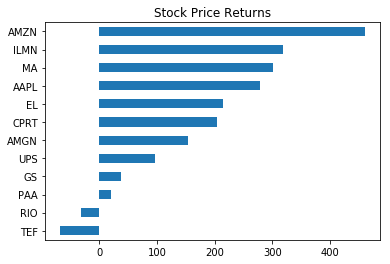

In [238]:
# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.show()

In [239]:
# Calculate number of shares outstanding
# 
# The next step towards building a value-weighted index is to calculate the number of shares for each index component.
# 
# The number of shares will allow you to calculate the total market capitalization for each component 
# given the historical price series in the next exercise.
# 
# Instructions
# 
# We have already imported pandas as pd, tickers and listings as in the previous exercises.
# 
# Inspect listings and print tickers.
# Use .loc[] with the list of tickers to select the index components and 
# the columns 'Market Capitalization' and 'Last Sale'; assign this to components.
# Print the first five rows of components.
# Create no_shares by dividing Market Capitalization by 'Last Sale'.
# Print no_shares in descending order.

In [240]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ACU to ZDGE
Data columns (total 6 columns):
Company Name             45 non-null object
Last Sale                45 non-null float64
Market Capitalization    45 non-null float64
IPO Year                 45 non-null float64
Sector                   45 non-null object
Industry                 45 non-null object
dtypes: float64(3), object(3)
memory usage: 3.7+ KB
None
     RIO
0   ILMN
1   CPRT
2     EL
3   AMZN
4    PAA
5     GS
6   AMGN
7     MA
8    TEF
9   AAPL
10   UPS


KeyError: "None of [Index([('R', 'I', 'O')], dtype='object', name='Stock Symbol')] are in the [index]"

In [259]:
# Create time series of market value
# 
# You can now use the number of shares to calculate the total market capitalization for each component 
# and trading date from the historical price series.
# 
# The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt for you. We have also created 
# the variables components and stock_prices that you worked with in the last exercises.
# 
# Select the 'Number of Shares' from components, assign to no_shares, and print the result, 
# sorted in the default (ascending) order.
# Multiply stock_prices by no_shares to create a time series of market cap per ticker, and assign it to market_cap.
# Select the first and the last row of market_cap and assign these to first_value and last_value.
# Use pd.concat() to concatenate first_value and last_value along axis=1 and plot the result as horizontal bar chart.

In [241]:
components = pd.read_excel('df.xlsx','ch4_Create_time_series',index_col='Stock Symbol')
path2 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\stock_data.csv'
stock_prices = pd.read_csv(path2, parse_dates=['Date'], index_col='Date')

Stock Symbol
ILMN     146.300000
EL       366.405816
GS       397.817439
CPRT     459.390316
AMZN     477.170618
PAA      723.404994
AMGN     735.890171
UPS      869.297154
MA      1108.884100
RIO     1808.717948
TEF     5037.804990
AAPL    5246.540000
Name: Number of Shares, dtype: float64


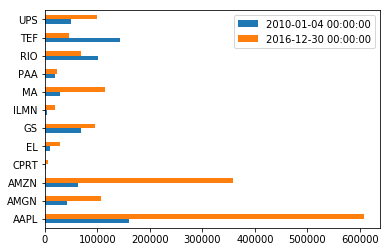

In [242]:
# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

In [243]:
# Calculate & plot the composite index
# 
# By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.
# 
# Use the time series of market capitalization that you created in the last exercise to aggregate 
# the market value for each period, and then normalize this series to convert it to an index.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt for you. 
# We have also loaded components and market_cap_series, which you worked with in the last exercise.
# 
# Aggregate the market cap per trading day by applying .sum() to market_cap_series with axis=1, 
# assign to raw_index and print the result.
# Normalize the aggregate market cap by dividing by the first value of raw_index and multiplying by 100. 
# Assign this to index and print the result.
# Plot the index with the title 'Market-Cap Weighted Index'.

In [244]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\market_cap_series.csv'
market_cap_series = pd.read_csv(path, parse_dates=['Date'], index_col='Date')

In [245]:
# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

Date
2010-01-04    6.948176e+05
2010-01-05    6.979957e+05
2010-01-06    6.946857e+05
2010-01-07    6.912416e+05
2010-01-08    6.958476e+05
2010-01-11    6.900534e+05
2010-01-12    6.804604e+05
2010-01-13    6.891775e+05
2010-01-14    6.886516e+05
2010-01-15    6.803840e+05
2010-01-19    6.950413e+05
2010-01-20    6.808697e+05
2010-01-21    6.639949e+05
2010-01-22    6.444539e+05
2010-01-25    6.500961e+05
2010-01-26    6.484830e+05
2010-01-27    6.531749e+05
2010-01-28    6.403780e+05
2010-01-29    6.280382e+05
2010-02-01    6.370596e+05
2010-02-02    6.433044e+05
2010-02-03    6.418327e+05
2010-02-04    6.147855e+05
2010-02-05    6.182118e+05
2010-02-08    6.132701e+05
2010-02-09    6.251142e+05
2010-02-10    6.233165e+05
2010-02-11    6.297971e+05
2010-02-12    6.276746e+05
2010-02-16    6.390117e+05
                  ...     
2016-11-17    1.532619e+06
2016-11-18    1.531333e+06
2016-11-21    1.555436e+06
2016-11-22    1.559177e+06
2016-11-23    1.554286e+06
2016-11-25    1.558921e

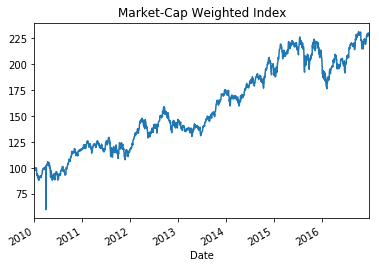

In [246]:
# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

In [247]:
# Calculate the contribution of each stock to the index
# 
# You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.
# 
# Let's also determine how much each stock has contributed to the index return.
# 
# Instructions
# 
# We have already imported pandas as pd and matplotlib.pyplot as plt for you. 
# We have also loaded components and the index you worked with in the last exercise.
# 
# Divide the last index value by the first, subtract 1 and multiply by 100. 
# Assign the result to index_return and print it.
# Select the 'Market Capitalization' column from components.
# Calculate the total market cap for all components and assign this to total_market_cap.
# Divide the components' market cap by total_market_cap to calculate the component weights, 
# assign it to weights, and print weights with the values sorted in default (ascending) order.
# Multiply weights by the index_return to calculate the contribution by component, 
# sort the values in ascending order, and plot the result as a horizontal bar chart.

In [248]:
# Calculate and print the index return here
index_return = (index.iloc[-1]/index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

126.65826661173813
Stock Symbol
CPRT    0.007564
PAA     0.012340
ILMN    0.014110
EL      0.017282
TEF     0.030324
RIO     0.039110
GS      0.049332
UPS     0.050077
AMGN    0.066039
MA      0.068484
AMZN    0.234410
AAPL    0.410929
Name: Market Capitalization, dtype: float64


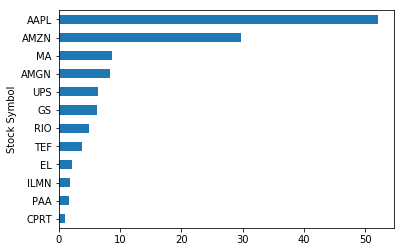

In [249]:
# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

In [250]:
# Compare index performance against benchmark I
# 
# The next step in analyzing the performance of your index is to compare it against a benchmark.
# 
# In the video, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, 
# which contains the 30 largest stocks, and would also be a reasonable benchmark for 
# the largest stocks from all sectors across the three exchanges.
# 
# Instructions
# 
# We have already imported pandas as pd, matplotlib.pyplot as plt for you. 
# We have also loaded your index and the DJIA data into variables index and djia, respectively, both as a pd.Series().
# 
# Convert index to a pd.DataFrame with the column name 'Index' and assign the result to data.
# Normalize djia to start at 100 and add it as new column to data.
# Show the total return for both index and djia by dividing the last row of data by the first, 
# subtracting 1 and multiplying by 100.
# Show a plot of both of the series in data.

In [251]:
path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\djia.csv'
djia = pd.read_csv(path, parse_dates=['date'], index_col='date')

Index    126.658267
DJIA      86.722172
dtype: float64


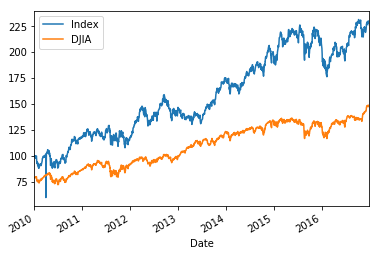

In [252]:
# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show()


In [253]:
# Compare index performance against benchmark II
# 
# The next step in analyzing the performance of your index is to compare it against a benchmark.
# 
# In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, 
# which contains the 30 largest stocks, and would also be a reasonable benchmark for 
# the largest stocks from all sectors across the three exchanges.
# 
# Instructions
# 
# We have already imported numpy as np, pandas as pd, matplotlib.pyplot as plt for you. 
# We have also loaded your Index and the Dow Jones Industrial Average (normalized) in a variable called data.
# 
# Inspect data and print the first five rows.
# Define a function multi_period_return that takes a numpy array of period returns as input, 
# and returns the total return for the period. Use the formula from the video - add 1 to the input,
# pass the result to np.prod(), subtract 1 and multiply by 100.
# Create a .rolling() window of length '360D' from data, and apply multi_period_return. Assign to rolling_return_360.
# Plot rolling_return_360 using the title 'Rolling 360D Return'.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
Index    1762 non-null float64
DJIA     1762 non-null float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index       DJIA
Date                             
2010-01-04  100.000000  78.933999
2010-01-05  100.457394  78.844952
2010-01-06   99.981005  78.857332
2010-01-07   99.485328  79.104785
2010-01-08  100.148231  79.189283


C:\Users\PAVILION 2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # Remove the CWD from sys.path while we load stuff.


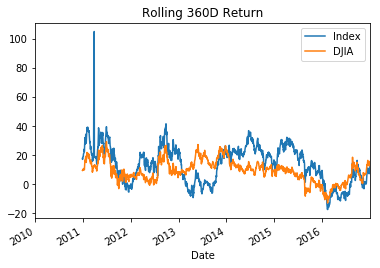

In [255]:
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()

In [256]:
# Visualize your index constituent correlations
# 
# To better understand the characteristics of your index constituents, you can calculate the return correlations.
# 
# Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!
# 
# Instructions
# 
# We have already imported pandas as pd, matplotlib.pyplot as plt, and seaborn as sns. 
# We have also loaded the historical price series of your index constituents into the variable stock_prices.
# 
# Inspect stock_prices using .info().
# Calculate the daily returns for stock_prices and assign the result to returns.
# Calculate the pairwise correlations for returns, assign them to correlations and print the result.
# Plot a seaborn annotated heatmap of the daily return correlations with the title 'Daily Return Correlations'.

In [257]:
path2 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Manipulating Time Series Data in Python\\stock_data\\stock_data.csv'
stock_prices = pd.read_csv(path2, parse_dates=['Date'], index_col='Date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726   
CPRT  0.346616  0.355892  0.298929  1.000000  0.371763  0.423160  0.265665   
EL    0.306770  0.349893  0.334031  0.371763  1.000000  0.358318  0.214027   

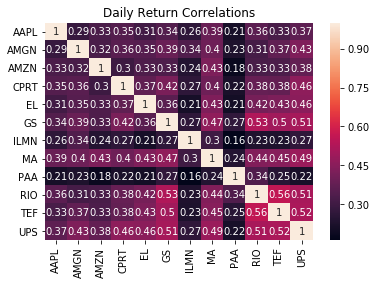

In [258]:
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show();

In [260]:
# Save your analysis to multiple excel worksheets
# 
# Now that you have completed your analysis, you may want to save all results into a single Excel workbook.
# 
# Let's practice exporting various DataFrame to multiple Excel worksheets.
# 
# Instructions
# 
# We have already imported pandas as pd for you. We have also loaded both 
# the historical price series of your index constituents into the variable stock_prices, and the index as index.
# 
# Inspect both index and stock_prices using .info().
# Use .join() to combine index with stock_prices, and assign to data.
# Apply .pct_change() to data and assign to returns.
# Create pd.ExcelWriter and use with to export data and returns to excel with sheet_names of the same name.

In [261]:
index = pd.read_excel('df.xlsx','ch4_Save_analysis', index_col='Date')

In [262]:
# Inspect index and stock_prices
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
#with pd.ExcelWriter('data.xls') as writer:
#    data.to_excel(writer, sheet_name='data')
#    returns.to_excel(writer, sheet_name='returns')

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2010-01-04 00:00:00 to 2016-12-30 00:00:00
Data columns (total 1 columns):
Index    61 non-null object
dtypes: object(1)
memory usage: 976.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1762 entries, 2010-01-04 00:00:00 to 2016-12-30 00:00:00
Data columns (total 13 columns):
AAPL     1761 non-null float64
AMGN     1761 non-null float64
AMZN     1761 non-null float64
CPRT     1761 non-null float6

In [263]:
returns.head()

AAPL      AMGN      AMZN      CPRT        EL  \
Date                                                                    
2010-01-04 00:00:00       NaN       NaN       NaN       NaN       NaN   
2010-01-05 00:00:00  0.001963 -0.008663  0.005900  0.000000 -0.003708   
2010-01-06 00:00:00 -0.015997 -0.007515 -0.018116 -0.004396  0.002895   
2010-01-07 00:00:00 -0.001991 -0.009157 -0.017013 -0.006623  0.012784   
2010-01-08 00:00:00  0.006649  0.008886  0.027077  0.004444  0.004072   

                           GS      ILMN        MA       PAA       RIO  \
Date                                                                    
2010-01-04 00:00:00       NaN       NaN       NaN       NaN       NaN   
2010-01-05 00:00:00  0.017680 -0.006547 -0.002726  0.011111  0.015527   
2010-01-06 00:00:00 -0.010673  0.061614 -0.001952 -0.000366  0.030580   
2010-01-07 00:00:00  0.019568  0.017070 -0.006651 -0.012092  0.000171   
2010-01-08 00:00:00 -0.018911  0.011596  0.000394  0.003338  0.011083   

                          TEF       UPS     Index  
Date                                               
2010-01-04 00:00:00       NaN       NaN       NaN  
2010-01-05 00:00:00 -0.000701  0.001719  0.004574  
2010-01-06 00:00:00 -0.010515 -0.007378 -0.004742  
2010-01-07 00:00:00 -0.017003 -0.007606 -0.004958  
2010-01-08 00:00:00 -0.006486  0.048075  0.006663

# END OF THIS EXCELLENT COURSE